In [7]:
!apt-get update
!apt-get install -y ffmpeg

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

Enter '1' to generate random DAG, '2' to input adjacency matrix: 1


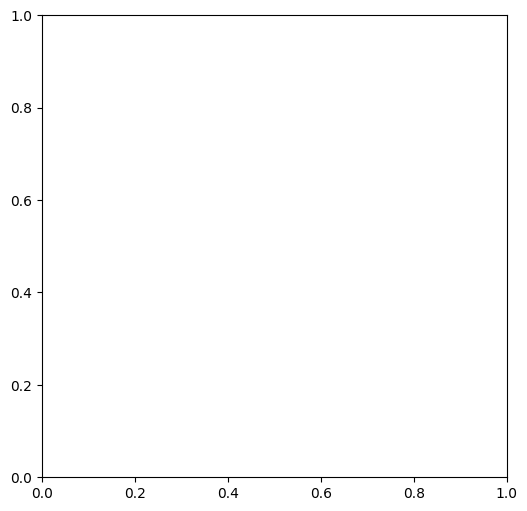

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# --- Step 1: Get User Choice ---
choice = input("Enter '1' to generate random DAG, '2' to input adjacency matrix: ")

if choice == "1":
    # --- Generate Random DAG ---
    num_nodes = 6
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):  # ensure acyclic by only forward edges
            if random.random() < 0.4:    # 40% chance to add edge
                G.add_edge(i, j)

else:
    # --- User Input Adjacency Matrix ---
    n = int(input("Enter number of nodes: "))
    print("Enter adjacency matrix (row by row, separated by spaces):")
    matrix = []
    for i in range(n):
        row = list(map(int, input().split()))
        matrix.append(row)

    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == 1:
                G.add_edge(i, j)

# --- Step 2: Generate Steps for Topological Sort (Kahn’s Algorithm) ---
def kahn_steps(graph):
    in_degree = {u: 0 for u in graph.nodes()}
    for u, v in graph.edges():
        in_degree[v] += 1

    queue = [u for u in graph.nodes() if in_degree[u] == 0]
    steps = []
    topo_order = []

    while queue:
        u = queue.pop(0)
        steps.append(("visit", u))
        topo_order.append(u)

        for v in list(graph.successors(u)):
            in_degree[v] -= 1
            steps.append(("decrease", (u, v)))
            if in_degree[v] == 0:
                queue.append(v)

    return steps, topo_order

steps, topo_order = kahn_steps(G)

# --- Step 3: Animation ---
pos = nx.spring_layout(G, seed=42)
fig, ax = plt.subplots(figsize=(6, 6))

visited_nodes = set()
edge_colors = {e: "black" for e in G.edges()}

def update(frame):
    ax.clear()
    action, item = steps[frame]

    if action == "visit":
        visited_nodes.add(item)

    elif action == "decrease":
        u, v = item
        edge_colors[(u, v)] = "orange"

    # Node coloring
    node_colors = []
    for n in G.nodes():
        if n in visited_nodes:
            node_colors.append("skyblue")
        else:
            node_colors.append("lightgrey")

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)

    nx.draw_networkx_edges(
        G, pos,
        edgelist=G.edges(),
        edge_color=[edge_colors.get(e, "black") for e in G.edges()],
        arrows=True,
        ax=ax
    )

    ax.set_title(f"Topological Sort - Step {frame+1}")


In [9]:
ani = animation.FuncAnimation(
    fig, update, frames=len(steps), interval=2500, repeat=False
)

ani.save("toposort_animation1.mp4", writer="ffmpeg")

print("Animation saved as toposort_animation1.mp4")


Animation saved as toposort_animation1.mp4


In [10]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('toposort_animation1.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=600 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")
